## 1) Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2) Read Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
images = pd.read_csv('/content/drive/My Drive/Data/CSV Converted Small Images (Colour).csv',header=None)
images

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.047059,0.050980,0.050980,0.035294,0.027451,0.011765,0.047059,0.035294,0.035294,0.047059,...,0.027451,0.019608,0.019608,0.019608,0.015686,0.019608,0.011765,0.015686,0.015686,0.015686
1,0.000000,0.082353,0.082353,0.000000,0.082353,0.090196,0.000000,0.086275,0.070588,0.003922,...,0.380392,0.039216,0.203922,0.141176,0.474510,0.592157,0.592157,0.000000,0.176471,0.247059
2,0.023622,0.011811,0.019685,0.019685,0.007874,0.015748,0.019685,0.011811,0.011811,0.011811,...,0.527559,0.023622,0.031496,0.035433,0.031496,0.023622,0.031496,0.023622,0.019685,0.027559
3,0.043137,0.066667,0.062745,0.066667,0.078431,0.082353,0.039216,0.054902,0.047059,0.047059,...,0.031373,0.003922,0.011765,0.015686,0.019608,0.027451,0.027451,0.047059,0.062745,0.066667
4,0.019608,0.027451,0.027451,0.031373,0.054902,0.000000,0.000000,0.031373,0.019608,0.196078,...,0.027451,0.003922,0.105882,0.043137,0.015686,0.074510,0.007843,0.000000,0.019608,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0.664032,0.604743,0.553360,0.628459,0.561265,0.494071,0.703557,0.648221,0.577075,0.754941,...,0.043478,0.090909,0.110672,0.106719,0.118577,0.114625,0.122530,0.102767,0.114625,0.130435
218,0.741177,0.521569,0.407843,0.745098,0.525490,0.411765,0.752941,0.525490,0.411765,0.749020,...,0.513725,0.239216,0.313725,0.450980,0.192157,0.254902,0.400000,0.141176,0.196078,0.321569
219,1.000000,0.768628,0.674510,0.996078,0.752941,0.658824,0.996078,0.745098,0.650980,0.992157,...,0.058824,0.203922,0.129412,0.109804,0.172549,0.105882,0.094118,0.172549,0.105882,0.082353
220,0.727273,0.750988,0.770751,0.758893,0.798419,0.826087,0.778656,0.826087,0.841897,0.739130,...,0.059289,0.047431,0.047431,0.043478,0.039526,0.047431,0.047431,0.055336,0.051383,0.071146


In [4]:
print("There are", len(images), "converted processed images read from csv file")

There are 222 converted processed images read from csv file


## 3) Cleaning Images from NA values and Converting Numpy format

In [5]:
images_no_na= images.dropna()
cleaned_images = images_no_na.drop_duplicates()
data = cleaned_images.to_numpy()

print("After dropping images with NA values and duplicate images, there are", len(data), "cleaned images")

After dropping images with NA values and duplicate images, there are 222 cleaned images


## 4) Splitting the images into Training and Testings sets

In [6]:
from sklearn.model_selection import train_test_split
train_x, val_x= train_test_split(data, test_size=0.20, random_state=42)

In [7]:
print('Reshaped Training set shape  : ', train_x.shape, '. Training set size  : ',train_x.size)
print('Reshaped Testing set shape   : ', val_x.shape, '. Testing set size   : ', val_x.size)

Reshaped Training set shape  :  (177, 7500) . Training set size  :  1327500
Reshaped Testing set shape   :  (45, 7500) . Testing set size   :  337500


## 5) Reshaping Images for both sets


100%|██████████| 177/177 [00:00<00:00, 815815.17it/s]



There are 177 reshaped images and it is <class 'list'> type



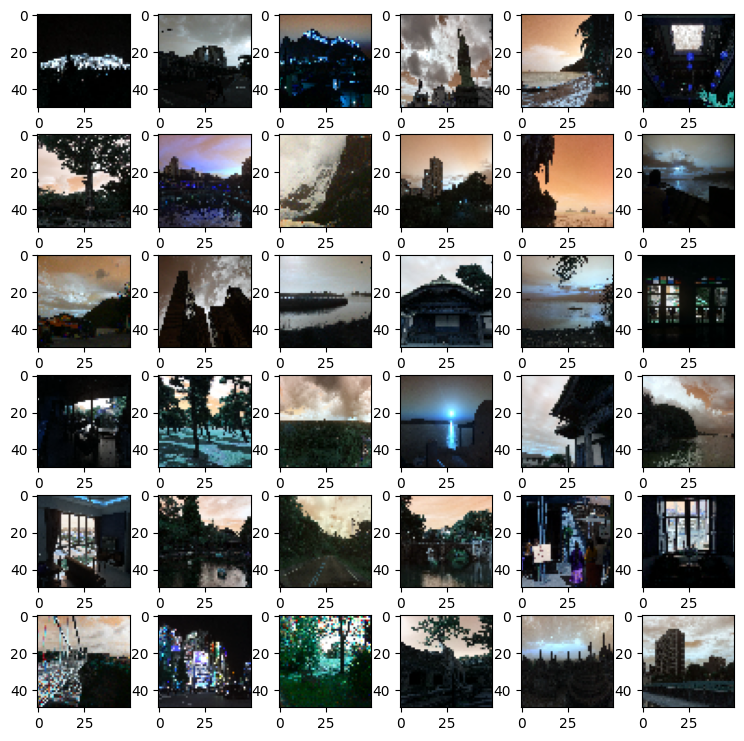

In [8]:
# reshaping image
train_x_reshaped = []
from tqdm import tqdm

for index in tqdm(range(len(train_x))):
  reshaped_image = train_x[index].reshape((50, 50, 3))
  train_x_reshaped.append(reshaped_image)


print("\nThere are", len(train_x_reshaped) , "reshaped images and it is", type(train_x_reshaped), "type\n")


fig, axes = plt.subplots(6, 6, figsize=(9, 9))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(train_x_reshaped[i])

100%|██████████| 45/45 [00:00<00:00, 416652.72it/s]



There are 45 reshaped images and it is <class 'list'> type



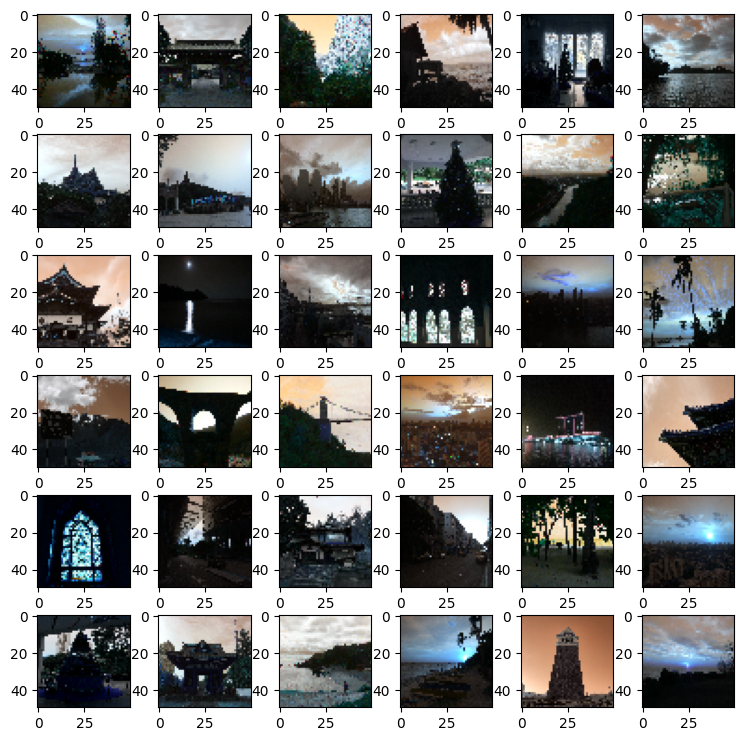

In [9]:
# reshaping image
val_x_reshaped = []

for index in tqdm(range(len(val_x))):
  reshaped_image = val_x[index].reshape((50, 50, 3))
  val_x_reshaped.append(reshaped_image)


print("\nThere are", len(val_x_reshaped) , "reshaped images and it is", type(val_x_reshaped), "type\n")


fig, axes = plt.subplots(6, 6, figsize=(9, 9))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(val_x_reshaped[i])

## 6) Creating Pixelated Images for both sets

In [11]:
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.3 MB/s eta 0:00:00


100%|██████████| 177/177 [00:00<00:00, 18847.22it/s]



There are 177 low resolution images and it is <class 'list'> type



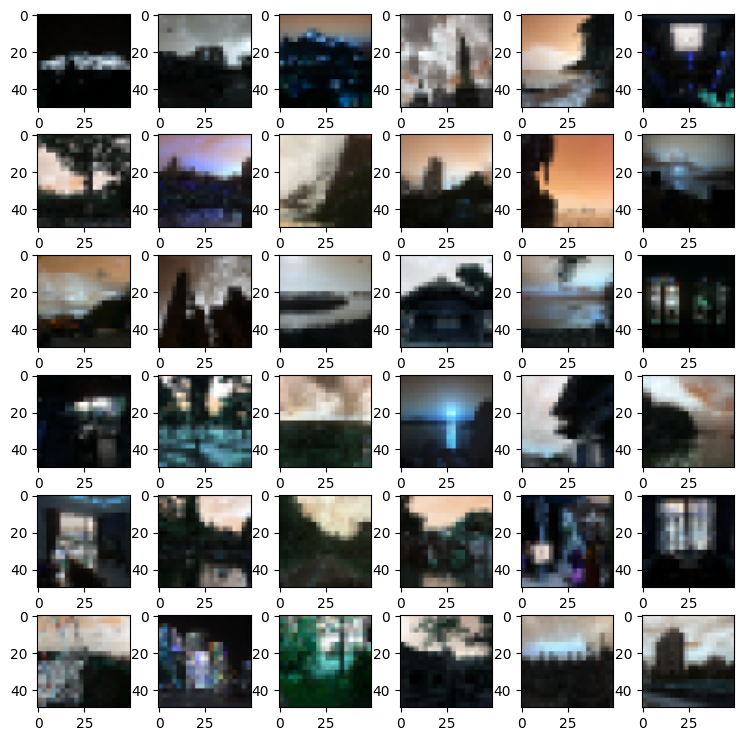

In [12]:
import cv2 as cv

#reduce image resolution while keeping the image size constant
train_low_res_images = []

for index in tqdm(range(len(train_x_reshaped))):
  #reduce image resolution
  small_image = cv.resize(train_x_reshaped[index], (int(50*40/100), int(50*40/100)), interpolation = cv.INTER_AREA)

  # scale back to original size
  low_res_image = cv.resize(small_image, (int(50), int(50)), interpolation = cv.INTER_AREA)

  train_low_res_images.append(low_res_image)


print("\nThere are", len(train_low_res_images) , "low resolution images and it is", type(train_low_res_images), "type\n")


fig, axes = plt.subplots(6, 6, figsize=(9, 9))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(train_low_res_images[i], cmap='binary')

100%|██████████| 45/45 [00:00<00:00, 20643.52it/s]



There are 45 low resolution images and it is <class 'list'> type



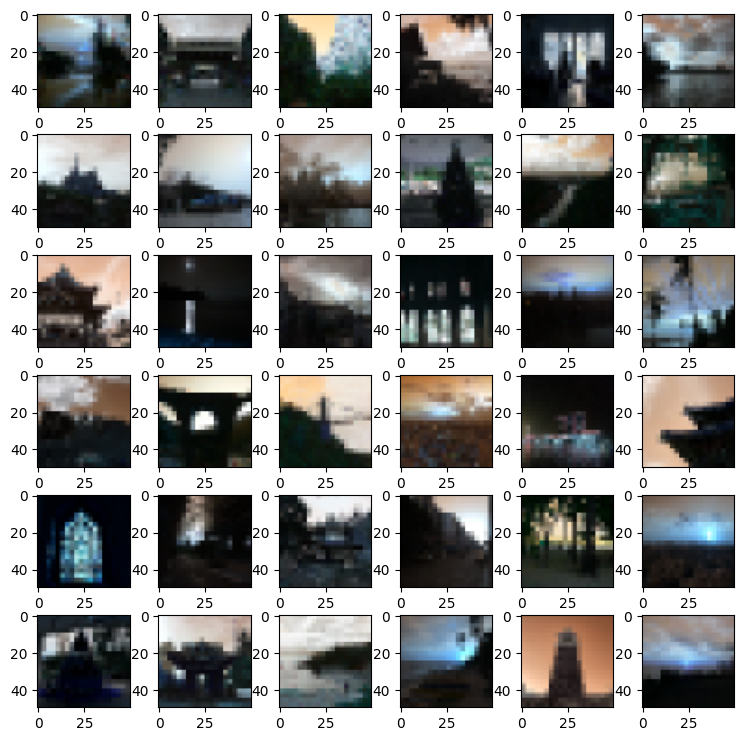

In [13]:
#reduce image resolution while keeping the image size constant
val_low_res_images = []

for index in tqdm(range(len(val_x_reshaped))):
  #reduce image resolution
  small_image = cv.resize(val_x_reshaped[index], (int(50*40/100), int(50*40/100)), interpolation = cv.INTER_AREA)

  # scale back to original size
  low_res_image = cv.resize(small_image, (int(50), int(50)), interpolation = cv.INTER_AREA)

  val_low_res_images.append(low_res_image)


print("\nThere are", len(val_low_res_images) , "low resolution images and it is", type(val_low_res_images), "type\n")


fig, axes = plt.subplots(6, 6, figsize=(9, 9))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(val_low_res_images[i], cmap='binary')

## 7) Determining Image shapes for all sets

In [14]:
print('Reshaped Training set shape  : ', train_x_reshaped[0].shape, '. Reshaped Training set size  : ',train_x_reshaped[0].size)
print('Reshaped Testing set shape   : ', val_x_reshaped[0].shape, '. Reshaped Testing set size   : ', val_x_reshaped[0].size)

Reshaped Training set shape  :  (50, 50, 3) . Reshaped Training set size  :  7500
Reshaped Testing set shape   :  (50, 50, 3) . Reshaped Testing set size   :  7500


In [15]:
print('Pixelated Training set shape  : ', train_low_res_images[0].shape, '. Pixelated Training set size  : ', train_low_res_images[0].size)
print('Pixelated Testing set shape   : ', val_low_res_images[0].shape, '. Pixelated Testing set size   : ', val_low_res_images[0].size)

Pixelated Training set shape  :  (50, 50, 3) . Pixelated Training set size  :  7500
Pixelated Testing set shape   :  (50, 50, 3) . Pixelated Testing set size   :  7500


## 8) Converting into Numpy Array

In [16]:
train_x_reshaped = np.array(train_x_reshaped)
val_x_reshaped = np.array(val_x_reshaped)
train_low_res_images = np.array(train_low_res_images)
val_low_res_images = np.array(val_low_res_images)

## 9) Training & Validating Neural Network Model on the Images

### 9.1) Importing Library for Modelling

In [18]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.8 MB/s eta 0:00:00


In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

### 9.2) Building Neural Network Architecture


In [20]:
Input_img = Input(shape=(50, 50, 3))

#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### 9.3) Overviewing Model Architecture Built

In [21]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 50, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 50, 50, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 50, 50, 3)      │         6,915 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 788,867 (3.01 MB)

 Trainable params: 788,867 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

### 9.4) Training the Neural Network Model

In [22]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e = autoencoder.fit(train_low_res_images, train_x_reshaped,
            epochs=50,
            batch_size=256,
            shuffle=True,
            validation_data=(val_low_res_images, val_x_reshaped),
            callbacks=[early_stopper])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - accuracy: 0.3157 - loss: 0.1928 - val_accuracy: 0.3384 - val_loss: 0.0591
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step - accuracy: 0.3113 - loss: 0.0564 - val_accuracy: 0.3356 - val_loss: 1.3885
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.3078 - loss: 1.2812 - val_accuracy: 0.2895 - val_loss: 0.0315
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.2969 - loss: 0.0318 - val_accuracy: 0.2434 - val_loss: 0.1099
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.2731 - loss: 0.1027 - val_accuracy: 0.2376 - val_loss: 0.1652
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.2606 - loss: 0.1531 - val_accuracy: 0.2668 - val_loss: 0.1861
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.2754 - loss: 0.1722 - val_accuracy: 0.3280 - val_loss: 0.1929
Epoch 7: early stopping


### 9.4) Listing Available Metrics Recorded During Model Training

In [23]:
# list all data in history
print(a_e.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### 9.5) Visualising the Model's loss during Model Training and Validating

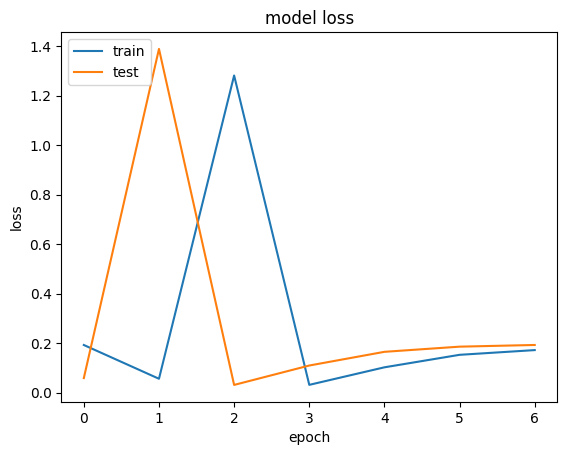

In [24]:
# summarize history for loss
plt.plot(a_e.history['loss'])
plt.plot(a_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 10) Predicting Pixelated Images Using Trained Model

In [25]:
predictions = autoencoder.predict(val_low_res_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 512ms/step


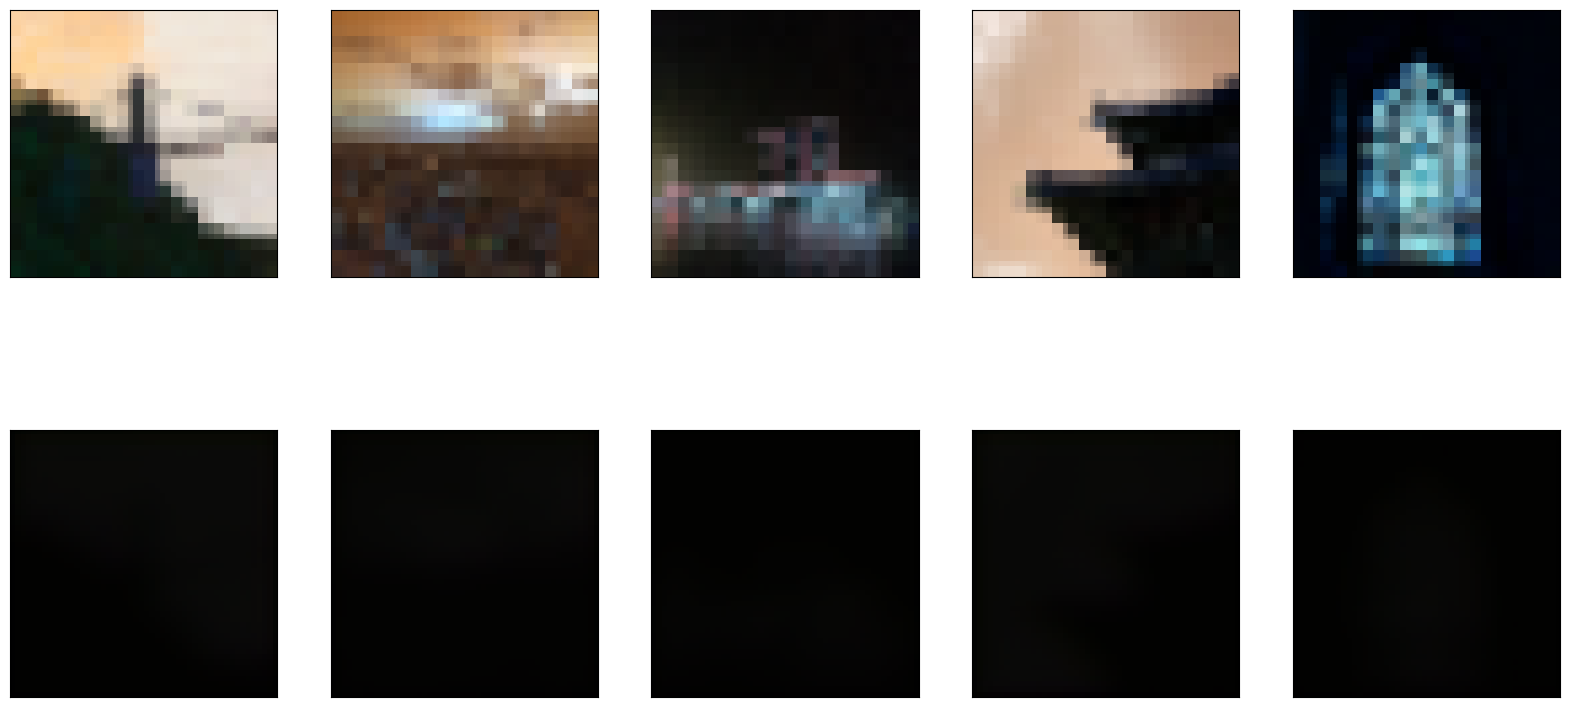

In [26]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(val_low_res_images[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

## 11) Training Neural Network Model again (with Accuracy metric recorded)

In [27]:
Input_img = Input(shape=(50, 50, 3))

#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

model_autoencoder = Model(Input_img, decoded)
model_autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [28]:
model_autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 50, 50, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 50, 50, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 50, 50, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 25, 25, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 50, 50, 3)      │         6,915 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 788,867 (3.01 MB)

 Trainable params: 788,867 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e_model = model_autoencoder.fit(train_low_res_images, train_x_reshaped,
            epochs=50,
            batch_size=256,
            shuffle=True,
            validation_data=(val_low_res_images, val_x_reshaped),
            callbacks=[early_stopper])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - accuracy: 0.2911 - loss: 0.1884 - val_accuracy: 0.4233 - val_loss: 0.0385
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.4230 - loss: 0.0378 - val_accuracy: 0.4140 - val_loss: 2.4561
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step - accuracy: 0.4162 - loss: 2.2715 - val_accuracy: 0.3835 - val_loss: 0.0425
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.3553 - loss: 0.0423 - val_accuracy: 0.3067 - val_loss: 0.1112
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.3186 - loss: 0.1037 - val_accuracy: 0.2574 - val_loss: 0.1724
Epoch 5: early stopping


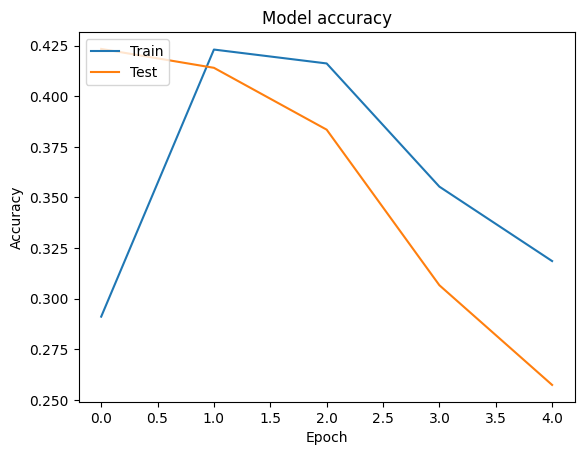

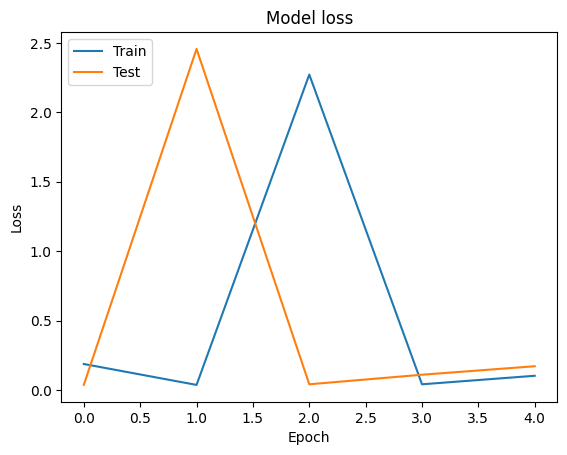

In [30]:
# summarize history for accuracy
plt.plot(a_e_model.history['accuracy'])
plt.plot(a_e_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(a_e_model.history['loss'])
plt.plot(a_e_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()